# Unsupervised Learning - Matrix Completion

In [2]:
!pip install fancyimpute

    100% |████████████████████████████████| 51kB 3.6MB/s 
    100% |████████████████████████████████| 61kB 8.0MB/s 
    100% |████████████████████████████████| 901kB 7.7MB/s 
    100% |████████████████████████████████| 153kB 12.2MB/s 
    100% |████████████████████████████████| 122kB 14.0MB/s 
    100% |████████████████████████████████| 143kB 13.6MB/s 
    100% |████████████████████████████████| 1.4MB 8.3MB/s 
  Running setup.py bdist_wheel for knnimpute ... - \ done
  Stored in directory: /root/.cache/pip/wheels/a3/92/31/c3f8864714e9938396c3a68d8c542531f7e2d7862bb750b2e3
  Running setup.py bdist_wheel for np-utils ... - \ done
  Stored in directory: /root/.cache/pip/wheels/45/57/c8/374ecee74d3b7cc32f026e5b473cdea111642d97f211478b6c
  Running setup.py bdist_wheel for cvxpy ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/10/e3/64

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import mean_squared_error
from fancyimpute import SimpleFill, KNN, MatrixFactorization

%matplotlib inline
plt.style.use("ggplot")

np.random.seed(0)

Using TensorFlow backend.


## Synthetic Data
First, let us create some synthetic data that we are going to use to test out a variety of matrix completion algorithms. Note that we force the data in $X$ to have a rank equal to five. 

In [0]:
# Create the data matrix X
n = 30
m = 30
inner_rank = 5
X = np.dot(np.random.randn(n, inner_rank), np.random.randn(inner_rank, m))

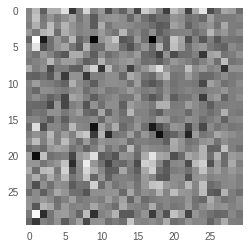

In [5]:
# Let's visualize the matrix X
plt.figure()
plt.imshow(X)
plt.grid(False)
plt.show()

## Removing Data From $X$
Since we are studying matrix completion algorithms we need to have some missing values! To do this we will randomly remove some data from $X$. 

Remember... since $X$ can be represented by `inner_rank = 5` linearly independent columns it should be relatively easy for a matrix completion algorithm to reconstruct the missing data.

In [0]:
missing_mask = np.random.rand(*X.shape) < 0.4
X_incomplete = X.copy()
# missing entries indicated with NaN
X_incomplete[missing_mask] = np.nan

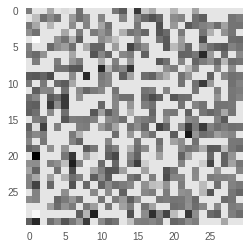

In [7]:
# Let's visualize the data matrix X_incomplete
plt.figure()
plt.imshow(X_incomplete)
plt.grid(False)
plt.show()

## Matrix Completion
Now, given the incomplete matrix `X_incomplete` we want to try and fill in the missing values. For this we are going to use the https://github.com/iskandr/fancyimpute package in Python.

For the first example, I will provide an example implementation where we fill in all the missing values using `SimpleFill`:

In [0]:
meanFill = SimpleFill("mean")
X_filled_mean = meanFill.fit_transform(X_incomplete)

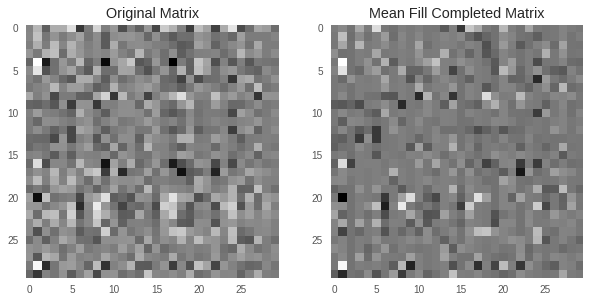

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

ax1.imshow(X)
ax1.set_title("Original Matrix")
ax1.grid(False)

ax2.imshow(X_filled_mean)
ax2.set_title("Mean Fill Completed Matrix")
ax2.grid(False)
plt.show()

In [0]:
# To test the performance of our matrix completion algorithm we want to compare
# the "filled-in" values to the original:
def mat_completion_mse(X_filled, X_truth, missing_mask):
    """Calculates the mean squared error of the filled in values vs. the truth
    
    Args:
        X_filled (np.ndarray): The "filled-in" matrix from a matrix completion algorithm
        X_truth (np.ndarray): The true filled in matrix
        missing_mask (np.ndarray): Boolean array of missing values
    
    Returns:
        float: Mean squares error of the filled values
    """
    mse = ((X_filled[missing_mask] - X[missing_mask]) ** 2).mean()
    return mse

In [11]:
meanFill_mse = mat_completion_mse(X_filled_mean, X, missing_mask)
print("meanFill MSE: %f" % meanFill_mse)

meanFill MSE: 5.241120


### KNN Completion
Next you will use the K-Nearest Neighbors algorithm to fill in the missing values. First, we will need to find the best number of neighbors to use for the KNN algorithm:

In [0]:
# Find the best value for k
def find_best_k(k_neighbors, complete_mat, incomplete_mat, missing_mask):
    """Determines the best k to use for matrix completion with KNN
    
    Args:
        k_neighbors (iterable): The list of k's to try
        complete_mat (np.ndarray): The original matrix with complete values
        incomplete_mat (np.ndarray): The matrix with missing values
        missing_mask (np.ndarray): Boolean array of missing values
    
    Returns:
        integer: the best value of k to use for that particular matrix
    """
    best_k = -1
    best_k_mse = np.infty
    
    for neighbors in k_neighbors:
        # YOUR CODE HERE
        # raise NotImplementedError()
        
        X_filled_knn = KNN(k=neighbors).fit_transform(incomplete_mat)
        
        mse = mat_completion_mse(X_filled_knn, complete_mat, missing_mask)
        if mse < best_k_mse:
          best_k_mse = mse
          best_k = neighbors
    return best_k

In [13]:
k_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
best_k = find_best_k(k_neighbors, X, X_incomplete, missing_mask)

Imputing row 1/30 with 19 missing, elapsed time: 0.003
Imputing row 1/30 with 19 missing, elapsed time: 0.001
Imputing row 1/30 with 19 missing, elapsed time: 0.001
Imputing row 1/30 with 19 missing, elapsed time: 0.001
Imputing row 1/30 with 19 missing, elapsed time: 0.001
Imputing row 1/30 with 19 missing, elapsed time: 0.001
Imputing row 1/30 with 19 missing, elapsed time: 0.001
Imputing row 1/30 with 19 missing, elapsed time: 0.001
Imputing row 1/30 with 19 missing, elapsed time: 0.001
Imputing row 1/30 with 19 missing, elapsed time: 0.001


In [0]:
assert best_k == 3

Now that we have found the `best_k` to use let's see how well it performed:

In [15]:
# Run KNN with the best_k and store the result in X_filled_knn

# YOUR CODE HERE
#raise NotImplementedError()
X_filled_knn = KNN(k=best_k).fit_transform(X_incomplete)
knnFill_mse = mat_completion_mse(X_filled_knn, X, missing_mask)
print("knnFill MSE: %f" % knnFill_mse)

Imputing row 1/30 with 19 missing, elapsed time: 0.001
knnFill MSE: 2.977082


In [0]:
assert knnFill_mse < meanFill_mse

## Visually Comparison of Matrix Completion Algorithms
To get a good idea of how these matrix completion algorithms compare we want to create a method that visualizes how well these algorithms actually perform.

In [0]:
# This is an implementation of a matrix completion algorithm using alternating minimization.
# It is derived from the handout supplied in today's class.

class AlternatingMinimization:
    def fit_transform(self, X_incomplete):
        P = np.random.random_sample((n, inner_rank))
        Q = np.random.random_sample((inner_rank, m))
        # Fill in all missing values with zeros
        X_incomplete_to_zero = np.nan_to_num(X_incomplete)

        for i in range(0, 100):
            P = X_incomplete_to_zero @ Q.T @ np.linalg.pinv(Q @ Q.T)
            Q = np.linalg.pinv(P.T @ P) @ P.T @ X_incomplete_to_zero

        X_filled = P @ Q
        
        return X_filled

#### Creating a Collection of Models
Now we create a handful of matrix completion algorithms that we want to visualize:
 - Mean Fill
 - K-Nearest Neighbors
 - Alternating Minimization (derived in class)
 - MatrixFactorization (an implementaiton using gradient descent)

In [0]:
simpleFill = SimpleFill("mean")
knnFill = KNN(k=best_k)
amFill = AlternatingMinimization()
mfFill = MatrixFactorization(learning_rate=0.01, rank=5, l2_penalty=0, min_improvement=1e-6)
methods = [simpleFill, knnFill, amFill, mfFill]
names = ["SimpleFill", "KNN", "AltMin", "MatFactor"]

In [0]:
from sklearn.metrics import mean_squared_error
def mat_completion_comparison(methods, incomplete_mat, complete_mat, missing_mask):
    """Using a list of provided matrix completion methods calculate 
    the completed matrix and the determine the associated 
    mean-squared-error results.
    
    Args:
        methods (iterable): A list of matrix completion algorithms
        incomplete_mat (np.ndarray): The incomplete matrix
        complete_mat (np.ndarray): The full matrix
        missing_mask (np.ndarray): Boolean array of missing values
    
    Returns:
        filled_mats (iterable): the "filled-in" matrices
        mses (iterable): the mean square error results
    """
    X_filled_mats = []
    mses = []
    #for method in methods:
        # YOUR CODE HERE
        #raise NotImplementedError()
        
        #mses
    for i in range(0, len(methods)):
        X_filled_mats.append(i)
        mses.append(i)
        X_filled_mats[i] = methods[i].fit_transform(X_incomplete)
        mses[i] = mean_squared_error(complete_mat, X_filled_mats[i])
    return X_filled_mats, mses

In [35]:
X_filled_mats, mses = mat_completion_comparison(methods, X_incomplete, X, missing_mask)
assert len(X_filled_mats) == len(methods)
assert len(mses) == len(methods)


Imputing row 1/30 with 19 missing, elapsed time: 0.003
Train on 471 samples, validate on 53 samples
Epoch 1/10000
471/471 [==============================] - 1s 2ms/step - loss: 1.1516 - val_loss: 1.0840
Epoch 2/10000
471/471 [==============================] - 0s 19us/step - loss: 1.1208 - val_loss: 1.0945
Epoch 3/10000
471/471 [==============================] - 0s 14us/step - loss: 1.0998 - val_loss: 1.1043
Epoch 4/10000
471/471 [==============================] - 0s 11us/step - loss: 1.0812 - val_loss: 1.1136
Epoch 5/10000
471/471 [==============================] - 0s 10us/step - loss: 1.0635 - val_loss: 1.1233
Epoch 6/10000
471/471 [==============================] - 0s 10us/step - loss: 1.0461 - val_loss: 1.1324


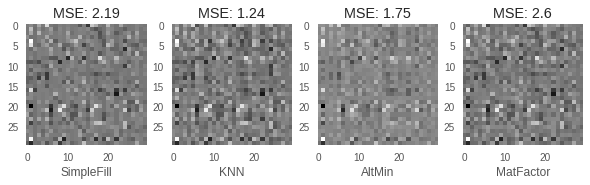

In [37]:
plt.figure(figsize = (10,6)) # Change the figure size to your liking

for i in range(0, len(methods)):
    X_filled = X_filled_mats[i]
    mse = mses[i]
    ax = plt.subplot(141 + i)
    ax.imshow(X_filled)
    ax.title.set_text("MSE: " + str(round(mse, 2)))
    ax.set_xlabel(names[i])
    ax.grid(False)
    
plt.show()

## Feedback

In [0]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    raise NotImplementedError()